In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [8]:
cancer =load_breast_cancer()

In [9]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)

In [10]:
score_history=[]

In [11]:
train_size=0.9
test_size=1.0-train_size
X_train,X_test,Y_train,Y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0,train_size=train_size,test_size=test_size)

In [12]:
print(X_train.shape,X_test.shape)

(512, 30) (57, 30)


In [13]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [14]:
model.score(X_test,Y_test)

0.9298245614035088

In [15]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)

In [16]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [17]:
model2.score(X_train,Y_train)

0.9375

In [18]:
model2.score(X_test,Y_test)

0.8596491228070176

In [19]:
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=0)

In [20]:
model3.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
model3.score(X_train,Y_train)

1.0

In [22]:
model3.score(X_test,Y_test)

0.9298245614035088

max depth=1: 0.8629173989455184
max depth=2: 0.8927943760984183
max depth=3: 0.945518453427065
max depth=4: 0.9209138840070299
max depth=5: 0.9261862917398945
max depth=6: 0.929701230228471
max depth=7: 0.9279437609841827
max depth=8: 0.9279437609841827
max depth=9: 0.9279437609841827
max depth=10: 0.9279437609841827
max depth=11: 0.9279437609841827
max depth=12: 0.9279437609841827
max depth=13: 0.9279437609841827
max depth=14: 0.9279437609841827
max depth=15: 0.9279437609841827
max depth=16: 0.9279437609841827
max depth=17: 0.9279437609841827
max depth=18: 0.9279437609841827
max depth=19: 0.9279437609841827


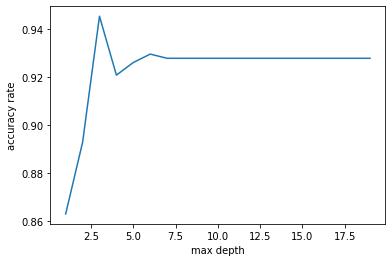

In [29]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
def main():
    dataset = load_breast_cancer()

    features = cancer.data
    targets = cancer.target

    # 調べる深さ
    MAX_DEPTH = 20
    depths = range(1, MAX_DEPTH)

    # 決定木の最大深度ごとに正解率を計算する
    accuracy_scores = []
    for depth in depths:

        predicted_labels = []
        loo = LeaveOneOut()
        for train, test in loo.split(features):
            train_data = features[train]
            target_data = targets[train]

            clf = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=0)
            clf.fit(train_data, target_data)

            predicted_label = clf.predict(features[test])
            predicted_labels.append(predicted_label)

        # 各深度での汎化性能を出力する
        score = accuracy_score(targets, predicted_labels)
        print('max depth={0}: {1}'.format(depth, score))

        accuracy_scores.append(score)

    # 最大深度ごとの正解率を折れ線グラフで可視化する
    X = list(depths)
    plt.plot(X, accuracy_scores)

    plt.xlabel('max depth')
    plt.ylabel('accuracy rate')
    plt.show()


if __name__ == '__main__':
    main()